In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.gridspec import GridSpec
sns.set_style('whitegrid')

# Collecting data

In [2]:
#combining data function

def combine_in_folder(path, ext, start_pat=np.nan ):
    """start_pat - optional"""
    import os
    if start_pat==np.nan:
       files_to_combine = [file for file in os.listdir(path) if file.endswith(str(ext)) and file.startswith(str(start_pat))]
    else:
        files_to_combine = [file for file in os.listdir(path) if file.endswith(str(ext))]

    df_list = []

    for file in files_to_combine:
        full_path = os.path.join(path, file)
        df_csv = pd.read_csv(full_path)
        df_list.append(df_csv)
        final_combined_df = pd.concat(df_list, ignore_index=True)
    return final_combined_df


#data quick summary function

def df_quick_info(df):
    report = pd.DataFrame(columns=['Column', 'Data Type', 'Unique Count', 'Unique Sample', 'Missing Values', 'Missing Percentage', 'Unique Percentage'])
    for column in df.columns:
        data_type = df[column].dtype
        unique_count = df[column].nunique()
        unique_sample = df[column].unique()[:5]
        missing_values = df[column].isnull().sum()
        missing_percentage = (missing_values / len(df)) * 100
        unique_percentage = (df[column].nunique() / len(df)) * 100
        report = pd.concat([report, pd.DataFrame({'Column': [column],
                                                      'Data Type': [data_type],
                                                      'Unique Count': [unique_count],
                                                      'Unique Sample': [unique_sample],
                                                      'Missing Values': [missing_values],
                                                      'Missing Percentage': [missing_percentage.round(4)],
                                                      'Unique Percentage': [unique_percentage]})],
                            ignore_index=True)
    return report

In [3]:
df_open = combine_in_folder('datasets', '.csv', 'df_open_20').drop_duplicates()

C:\Users\Oleh\AppData\Local\Temp\ipykernel_9064\3613572312.py:15: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_csv = pd.read_csv(full_path)
C:\Users\Oleh\AppData\Local\Temp\ipykernel_9064\3613572312.py:15: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_csv = pd.read_csv(full_path)
C:\Users\Oleh\AppData\Local\Temp\ipykernel_9064\3613572312.py:15: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_csv = pd.read_csv(full_path)
C:\Users\Oleh\AppData\Local\Temp\ipykernel_9064\3613572312.py:15: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_csv = pd.read_csv(full_path)


In [4]:
df_open.tail(5)

,competitorId,competitorName,firstName,lastName,gender,genderId,age,ageNull,height,heightNull,...,status,statusId,year,overallRank,overallScore,openCompetitor,openRank,openScore,gamesCompetitions,openCompetitions
3012569,2105434,Beth Hampson,Beth,Hampson,F,2,34.0,NaN,NaN,NaN,...,ACT,NaN,2023,124124,458895,NaN,NaN,NaN,NaN,NaN
3012570,2331240,Ellen Anevicius,Ellen,Anevicius,F,2,34.0,NaN,NaN,NaN,...,ACT,NaN,2023,124124,458895,NaN,NaN,NaN,NaN,NaN
3012571,1710035,Tanja Kurtz,Tanja,Kurtz,F,6,54.0,NaN,175 cm,NaN,...,ACT,NaN,2023,124124,458895,NaN,NaN,NaN,NaN,NaN
3012572,1946832,Hannah Deutsch,Hannah,Deutsch,F,2,34.0,NaN,NaN,NaN,...,ACT,NaN,2023,124124,458895,NaN,NaN,NaN,NaN,NaN
3012573,2306867,Rabbia Sohail,Rabbia,Sohail,F,2,34.0,NaN,NaN,NaN,...,ACT,NaN,2023,124124,458895,NaN,NaN,NaN,NaN,NaN


In [5]:
print(df_open.shape)
display(df_quick_info(df_open))

(3012574, 30)


,Column,Data Type,Unique Count,Unique Sample,Missing Values,Missing Percentage,Unique Percentage
0,competitorId,int64,1393056,"[1616, 1685, 1690, 1721, 1812]",0,0.0000,46.241387
1,competitorName,object,1236671,"[Russ Greene, Christopher Woods, Travis Mayer,...",3,0.0001,41.050311
2,firstName,object,116659,"[Russ, Christopher, Travis, Jeremy, Miranda]",5,0.0002,3.872403
3,lastName,object,339597,"[Greene, Woods, Mayer, Mghenyi, Oldroyd]",30,0.0010,11.272653
4,gender,object,2,"[M, F]",0,0.0000,0.000066
5,genderId,int64,12,"[1, 2, 12, 3, 5]",0,0.0000,0.000398
6,age,float64,101,"[20.0, 21.0, 29.0, 23.0, 25.0]",1,0.0000,0.003353
7,ageNull,float64,2,"[0.0, 1.0, nan]",3010860,99.9431,0.000066
8,height,object,558,"[178.0, 163.0, 181.0, 173.0, 166.0]",1753790,58.2157,0.018522
9,heightNull,float64,2,"[0.0, 1.0, nan]",3010860,99.9431,0.000066


In [6]:
df_open = df_open.drop(columns=['ageNull', 'heightNull', 'weightNull', 'bmiNull', 'openCompetitor', 'openRank', 'openScore', 'gamesCompetitions', 'openCompetitions', 'statusId', 'bmi'])
df_open = df_open.query('year>=2020')

In [7]:
df_quick_info(df_open)

,Column,Data Type,Unique Count,Unique Sample,Missing Values,Missing Percentage,Unique Percentage
0,competitorId,int64,634835,"[1690, 2088, 2099, 2476, 2536]",0,0.0000,60.233253
1,competitorName,object,594895,"[Travis Mayer, Camilla Salomonsson Hellman, Ha...",3,0.0003,56.443739
2,firstName,object,73288,"[Travis, Camilla, Harriet, Luke, Samantha]",4,0.0004,6.953578
3,lastName,object,205236,"[Mayer, Salomonsson Hellman, Roberts, Schafer,...",9,0.0009,19.472827
4,gender,object,2,"[M, F]",0,0.0000,0.000190
5,genderId,int64,12,"[1, 2, 18, 12, 16]",0,0.0000,0.001139
6,age,float64,39,"[29.0, 30.0, 31.0, 28.0, 26.0]",1,0.0001,0.003700
7,height,object,430,"[181.0, 165.0, 171.0, 173.0, 170.0]",514629,48.8281,0.040798
8,weight,object,621,"[93.0, 69.0, 68.0, 84.0, 62.0]",504118,47.8308,0.058921
9,affiliateName,object,16048,"[CrossFit Passion, CrossFit UNTD, CrossFit Nor...",120331,11.4170,1.522637


In [8]:
print(len(df_open[df_open.countryOfOriginName.isnull() & df_open.regionName.notnull()]))
null_countries = df_open[df_open.countryOfOriginName.isnull() & df_open.regionName.notnull()]
print(set(null_countries.regionName))
print(set(null_countries.countryOfOriginCode))

4261
{'Europe', 'Asia'}
{'BY', 'RU'}


In [9]:
for ind, row in df_open.iterrows():
    if pd.isna(row['countryOfOriginName']) and row['countryOfOriginCode'] == 'RU':
        df_open.at[ind, 'countryOfOriginName'] = 'Russia'
    elif pd.isna(row['countryOfOriginName']) and row['countryOfOriginCode'] == 'BY':
        df_open.at[ind, 'countryOfOriginName'] = 'Belarus'
    #elif pd.isna(row['countryOfOriginName']) and pd.isna(row['countryOfOriginCode']) and str(row['regionName']).startswith('Canada'):
        #df_open.at[ind, 'countryOfOriginName'] = 'Canada'
    #elif pd.isna(row['countryOfOriginName']) and pd.isna(row['countryOfOriginCode']) and str(row['regionName']).endswith('California'):
        #df_open.at[ind, 'countryOfOriginName'] = 'USA'
    #elif pd.isna(row['countryOfOriginName']) and pd.isna(row['countryOfOriginCode']) and row['regionName']=='Australia':
        #df_open.at[ind, 'countryOfOriginName'] = 'Australia'

In [10]:
df_open

,competitorId,competitorName,firstName,lastName,gender,genderId,age,height,weight,affiliateName,affiliateId,countryOfOriginName,countryOfOriginCode,regionName,regionId,status,year,overallRank,overallScore
7,1690,Travis Mayer,Travis,Mayer,M,1,29.0,181.0,93.0,CrossFit Passion,7104,United States,1,North America,1,ACT,2020,19,0
8,1690,Travis Mayer,Travis,Mayer,M,1,30.0,181.0,93.0,CrossFit UNTD,7104,United States,1,North America,1,ACT,2021,12,822
9,1690,Travis Mayer,Travis,Mayer,M,1,31.0,181.0,93.0,CrossFit UNTD,7104,United States,1,North America,1,ACT,2022,18,685
18,2088,Camilla Salomonsson Hellman,Camilla,Salomonsson Hellman,F,2,29.0,165.0,69.0,CrossFit Nordic,1009,Sweden,11,Europe,4,ACT,2020,23,0
19,2099,Harriet Roberts,Harriet,Roberts,F,2,28.0,171.0,68.0,CrossFit Athletic,2414,New Zealand,2,Oceania,7,ACT,2020,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3012569,2105434,Beth Hampson,Beth,Hampson,F,2,34.0,NaN,NaN,NaN,None,United Kingdom,GB,Europe,29,ACT,2023,124124,458895
3012570,2331240,Ellen Anevicius,Ellen,Anevicius,F,2,34.0,NaN,NaN,CrossFit Raw Appeal,11124,United States,US,North America West,34,ACT,2023,124124,458895
3012571,1710035,Tanja Kurtz,Tanja,Kurtz,F,6,54.0,175 cm,60 kg,NaN,None,Germany,DE,Europe,29,ACT,2023,124124,458895
3012572,1946832,Hannah Deutsch,Hannah,Deutsch,F,2,34.0,NaN,NaN,Koda CrossFit Iron View,22011,United States,US,North America West,34,ACT,2023,124124,458895


In [11]:
#cleaning height and weight columns

def clean_weight(col):
    if pd.isna(col):
        return float('nan')
    elif 'kg' in str(col):
        return round(float(col.split('kg')[0].strip()), 0)
    elif 'lb' in str(col):
        return round(float(col.split('lb')[0].strip()) / 2.205, 0)
    else:
        return float('nan')

def clean_height(col):
    if pd.isna(col):
        return float('nan')
    elif 'cm' in str(col):
        return round(float(col.split('cm')[0].strip()), 0)
    elif 'in' in str(col):
        return round(float(col.split('in')[0].strip()) * 2.54)
    else:
        return float('nan')

In [12]:
df_open['weight'] = df_open['weight'].apply(clean_weight).astype('float')
df_open['height'] = df_open['height'].apply(clean_height).astype('float')

#replacing enormous values
df_open['weight'] = np.clip(df_open['weight'], 40, 130)
df_open['height'] = np.clip(df_open['height'], 140, 230)

weight


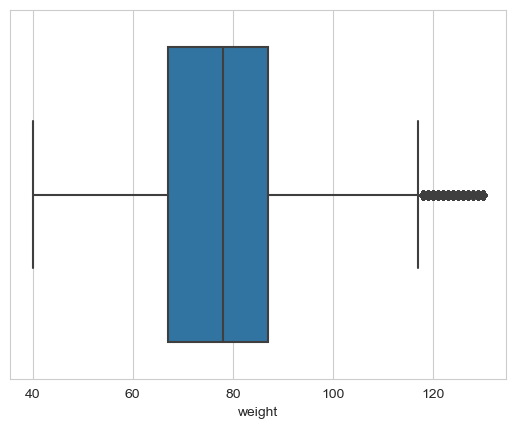

height


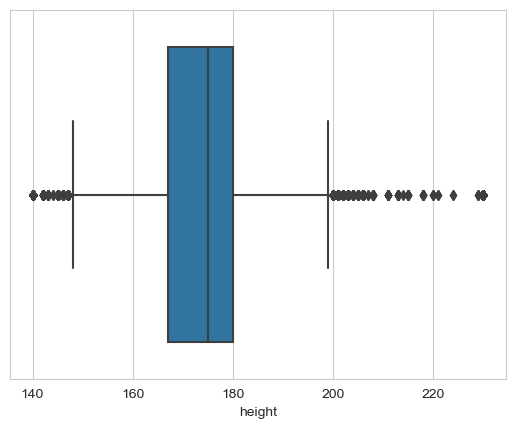

In [13]:
for i in ['weight', 'height']:
    print(i)
    ax1 = sns.boxplot(x=i, data=df_open)
    plt.show()

In [14]:
df_open['overallRank'] = df_open.overallRank.astype('int')
df_open['overallScore'] = df_open.overallScore.astype('int')

In [15]:
df_quick_info(df_open)

,Column,Data Type,Unique Count,Unique Sample,Missing Values,Missing Percentage,Unique Percentage
0,competitorId,int64,634835,"[1690, 2088, 2099, 2476, 2536]",0,0.0000,60.233253
1,competitorName,object,594895,"[Travis Mayer, Camilla Salomonsson Hellman, Ha...",3,0.0003,56.443739
2,firstName,object,73288,"[Travis, Camilla, Harriet, Luke, Samantha]",4,0.0004,6.953578
3,lastName,object,205236,"[Mayer, Salomonsson Hellman, Roberts, Schafer,...",9,0.0009,19.472827
4,gender,object,2,"[M, F]",0,0.0000,0.000190
5,genderId,int64,12,"[1, 2, 18, 12, 16]",0,0.0000,0.001139
6,age,float64,39,"[29.0, 30.0, 31.0, 28.0, 26.0]",1,0.0001,0.003700
7,height,float64,78,"[nan, 170.0, 180.0, 175.0, 173.0]",514930,48.8566,0.007401
8,weight,float64,91,"[nan, 88.0, 93.0, 85.0, 89.0]",504419,47.8594,0.008634
9,affiliateName,object,16048,"[CrossFit Passion, CrossFit UNTD, CrossFit Nor...",120331,11.4170,1.522637


In [16]:
for i in df_open.competitorName[:10].str.split(' '):
    print(i[0])

Travis
Travis
Travis
Camilla
Harriet
Luke
Samantha
Samantha
Noah
Noah


In [17]:
#defining numeric values
numeric_cols = [v for v in df_open.columns if df_open[v].dtype != 'O' and not str(v).upper().endswith('ID')]

df_open[numeric_cols].describe()

,age,height,weight,year,overallRank,overallScore
count,1.053960e+06,539031.000000,549542.000000,1.053961e+06,1.053961e+06,1.053961e+06
mean,3.448988e+01,173.665680,77.752259,2.021620e+03,6.749294e+04,2.573631e+05
std,8.251277e+00,10.901019,14.764025,1.114580e+00,4.078340e+04,1.419792e+05
min,1.600000e+01,140.000000,40.000000,2.020000e+03,0.000000e+00,0.000000e+00
25%,2.800000e+01,167.000000,67.000000,2.021000e+03,3.286100e+04,1.432630e+05
50%,3.400000e+01,175.000000,78.000000,2.022000e+03,6.579800e+04,2.563310e+05
75%,4.000000e+01,180.000000,87.000000,2.023000e+03,9.937900e+04,3.612300e+05
max,5.400000e+01,230.000000,130.000000,2.023000e+03,1.577420e+05,5.827770e+05


<Axes: >

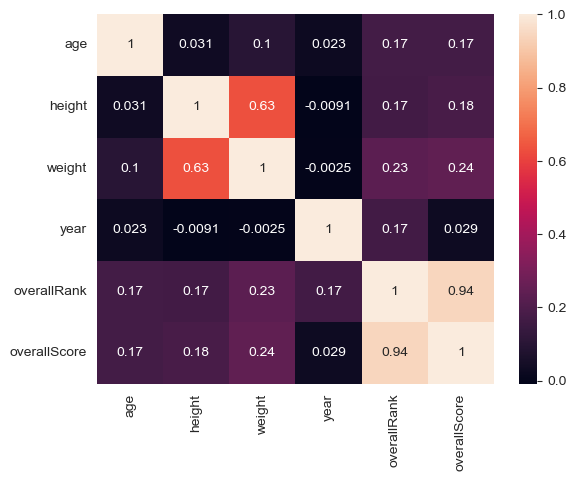

In [18]:
sns.heatmap(df_open[numeric_cols].corr(), annot=True)

height and weight, and rank and score are correlated which is understandable

# Distributions

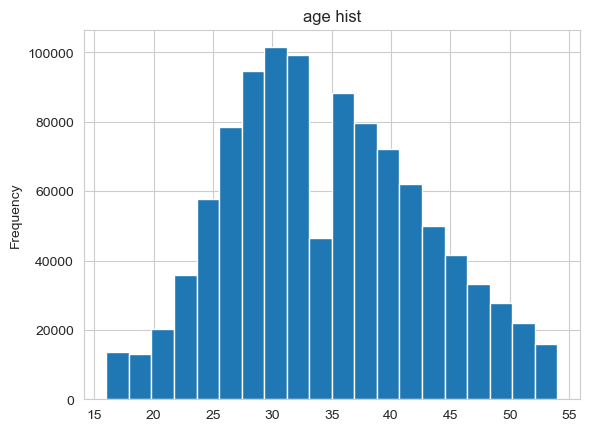

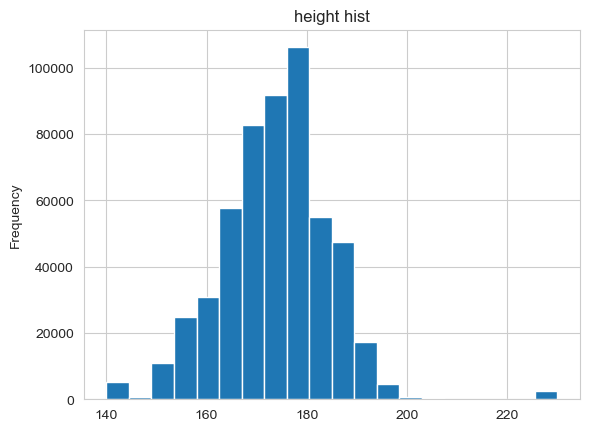

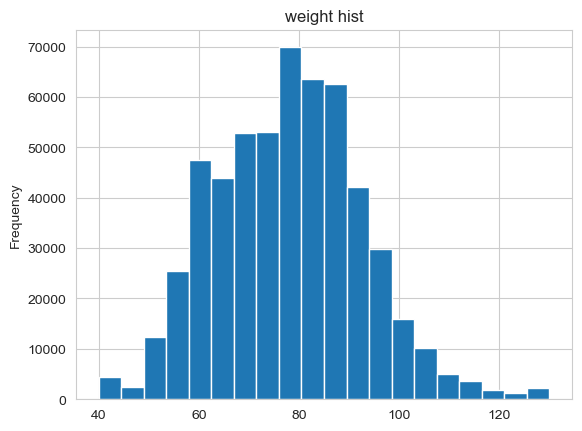

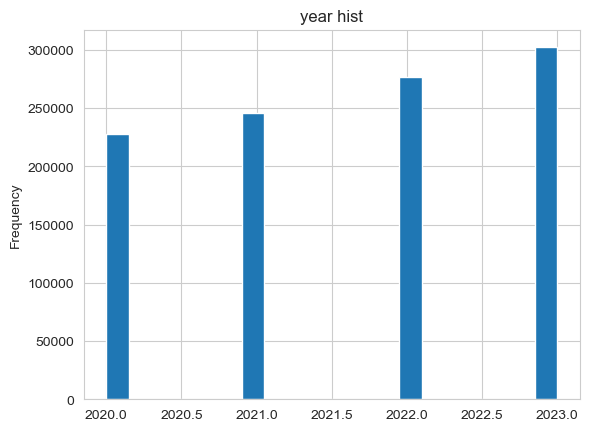

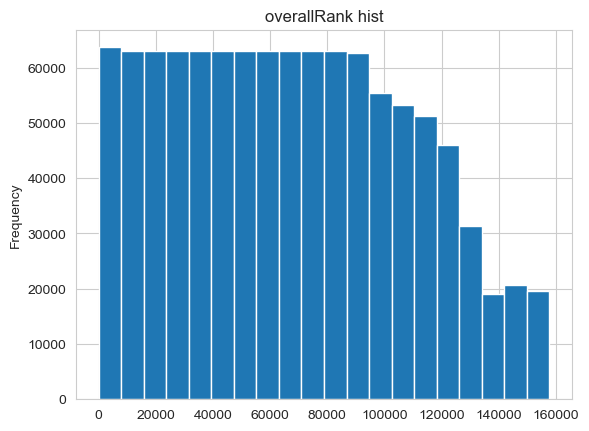

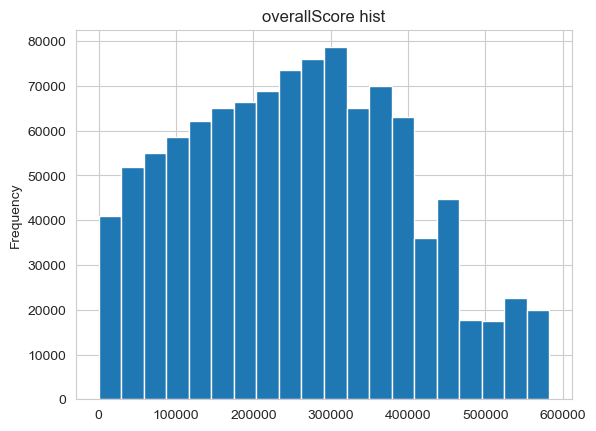

In [19]:
for i in numeric_cols:
    df_open[i].plot(kind='hist', bins=20)
    plt.title(i + ' hist')
    plt.show()

# Distribution per M/F

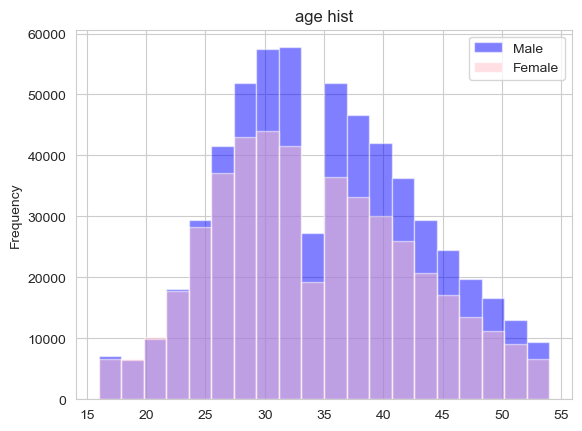

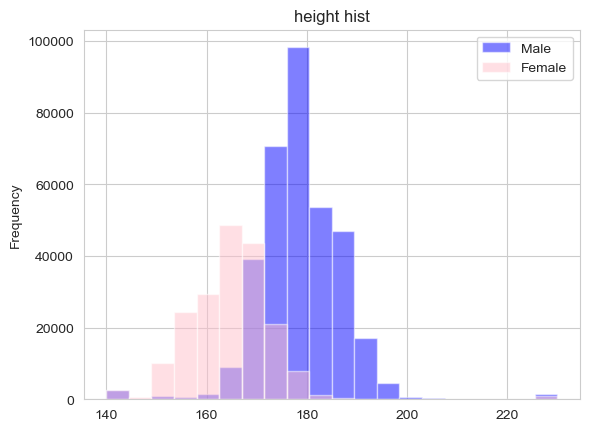

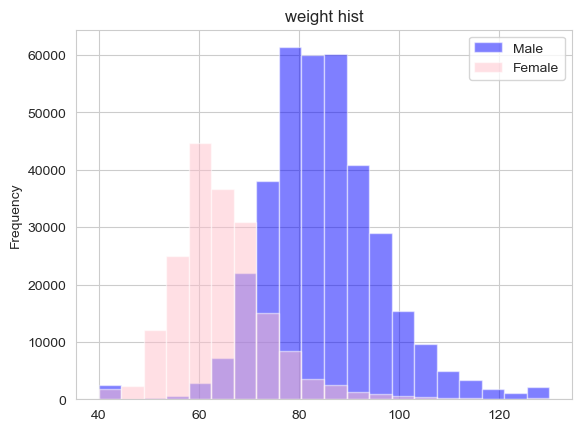

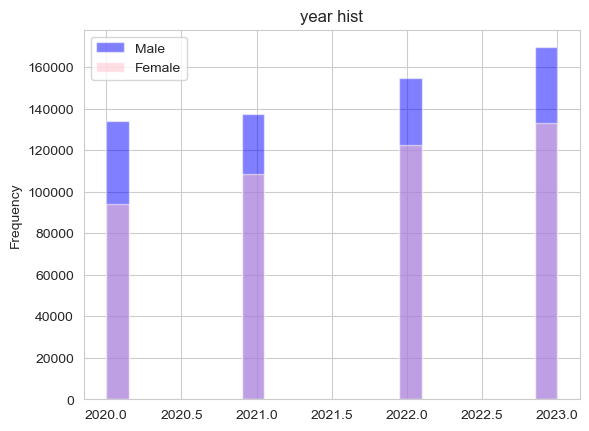

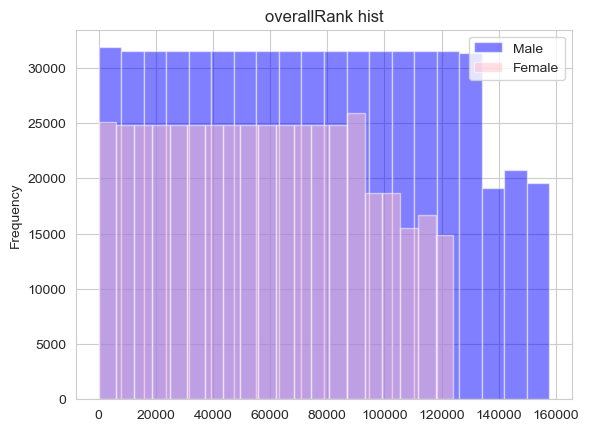

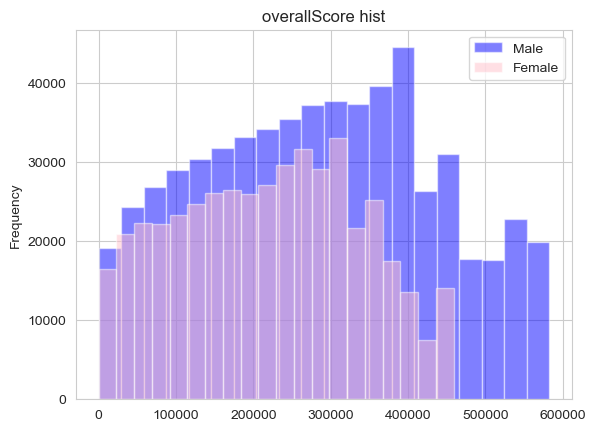

In [20]:
for i in numeric_cols:
    df_open.query('gender=="M"')[i].plot(kind='hist', bins=20, color='blue', alpha=0.5, label='Male')
    df_open.query('gender=="F"')[i].plot(kind='hist', bins=20, color='pink', alpha=0.5, label='Female')
    plt.title(i + ' hist')
    plt.legend()
    plt.show()

# Distribution by Locations

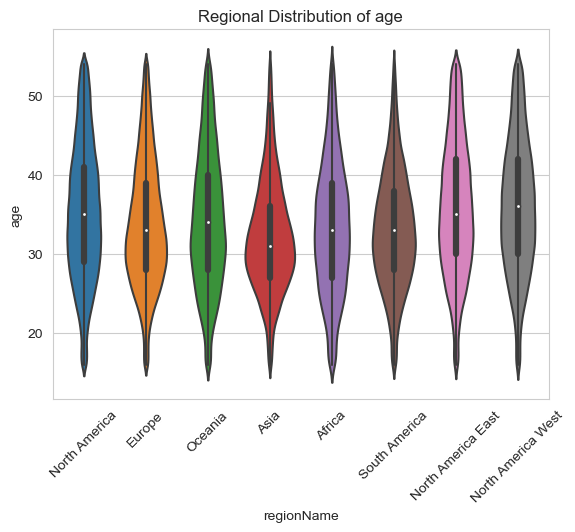

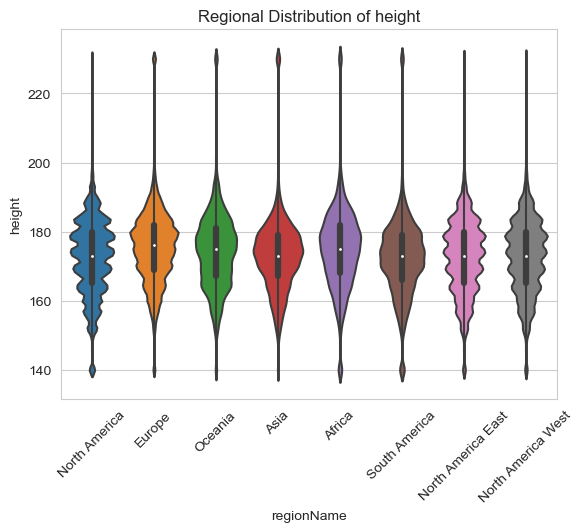

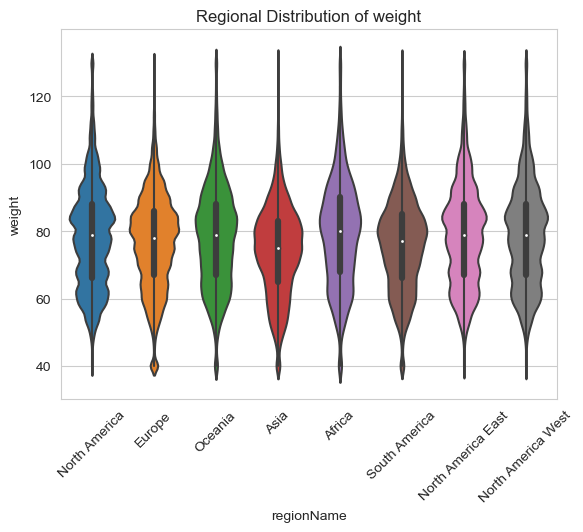

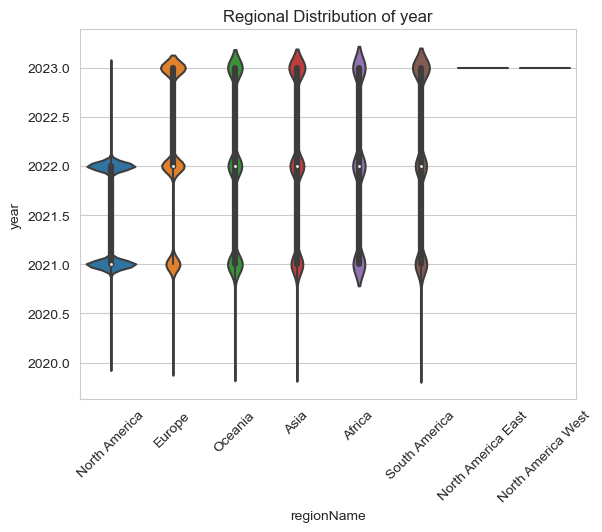

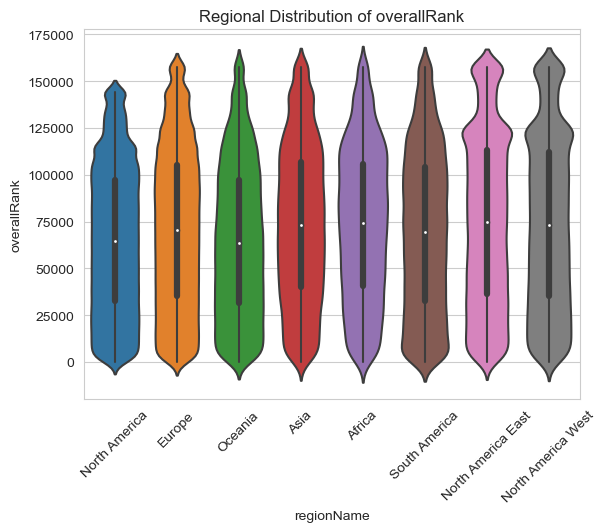

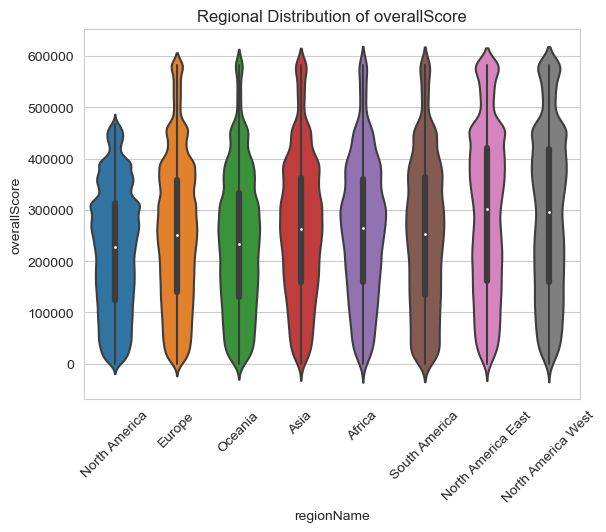

In [21]:
for i in numeric_cols:
    sns.violinplot(x='regionName', y = i, data = df_open)
    plt.xticks(rotation=45)
    plt.title('Regional Distribution of '+i)
    plt.show()

In [22]:
def clean_location(x):
    if 'North America' in str(x):
        return 'North America'
    else:
        return x


df_open['location_clean'] = df_open.regionName.apply(clean_location)

In [23]:
summary_df = df_open.groupby('location_clean').agg({'competitorId':'nunique','age':'mean','countryOfOriginName':'nunique','affiliateName':'nunique','overallScore':'sum'}).sort_values('overallScore', ascending=False).reset_index() \
    .rename(columns={'competitorId':'number_of_attendees', 'age':'mean_age','countryOfOriginName':'number_of_origin_countries', 'affiliateName':'number_of_events', 'overallScore':'total_score'}).round(0)

summary_df

,location_clean,number_of_attendees,mean_age,number_of_origin_countries,number_of_events,total_score
0,North America,257420,35.0,46,7311,102879424051
1,Europe,164993,34.0,60,6267,63023090055
2,Oceania,35028,34.0,18,1223,13126552572
3,Asia,30353,32.0,56,2282,11539061968
4,South America,28866,33.0,13,2467,10133617687
5,Africa,14699,33.0,45,1055,5935057295


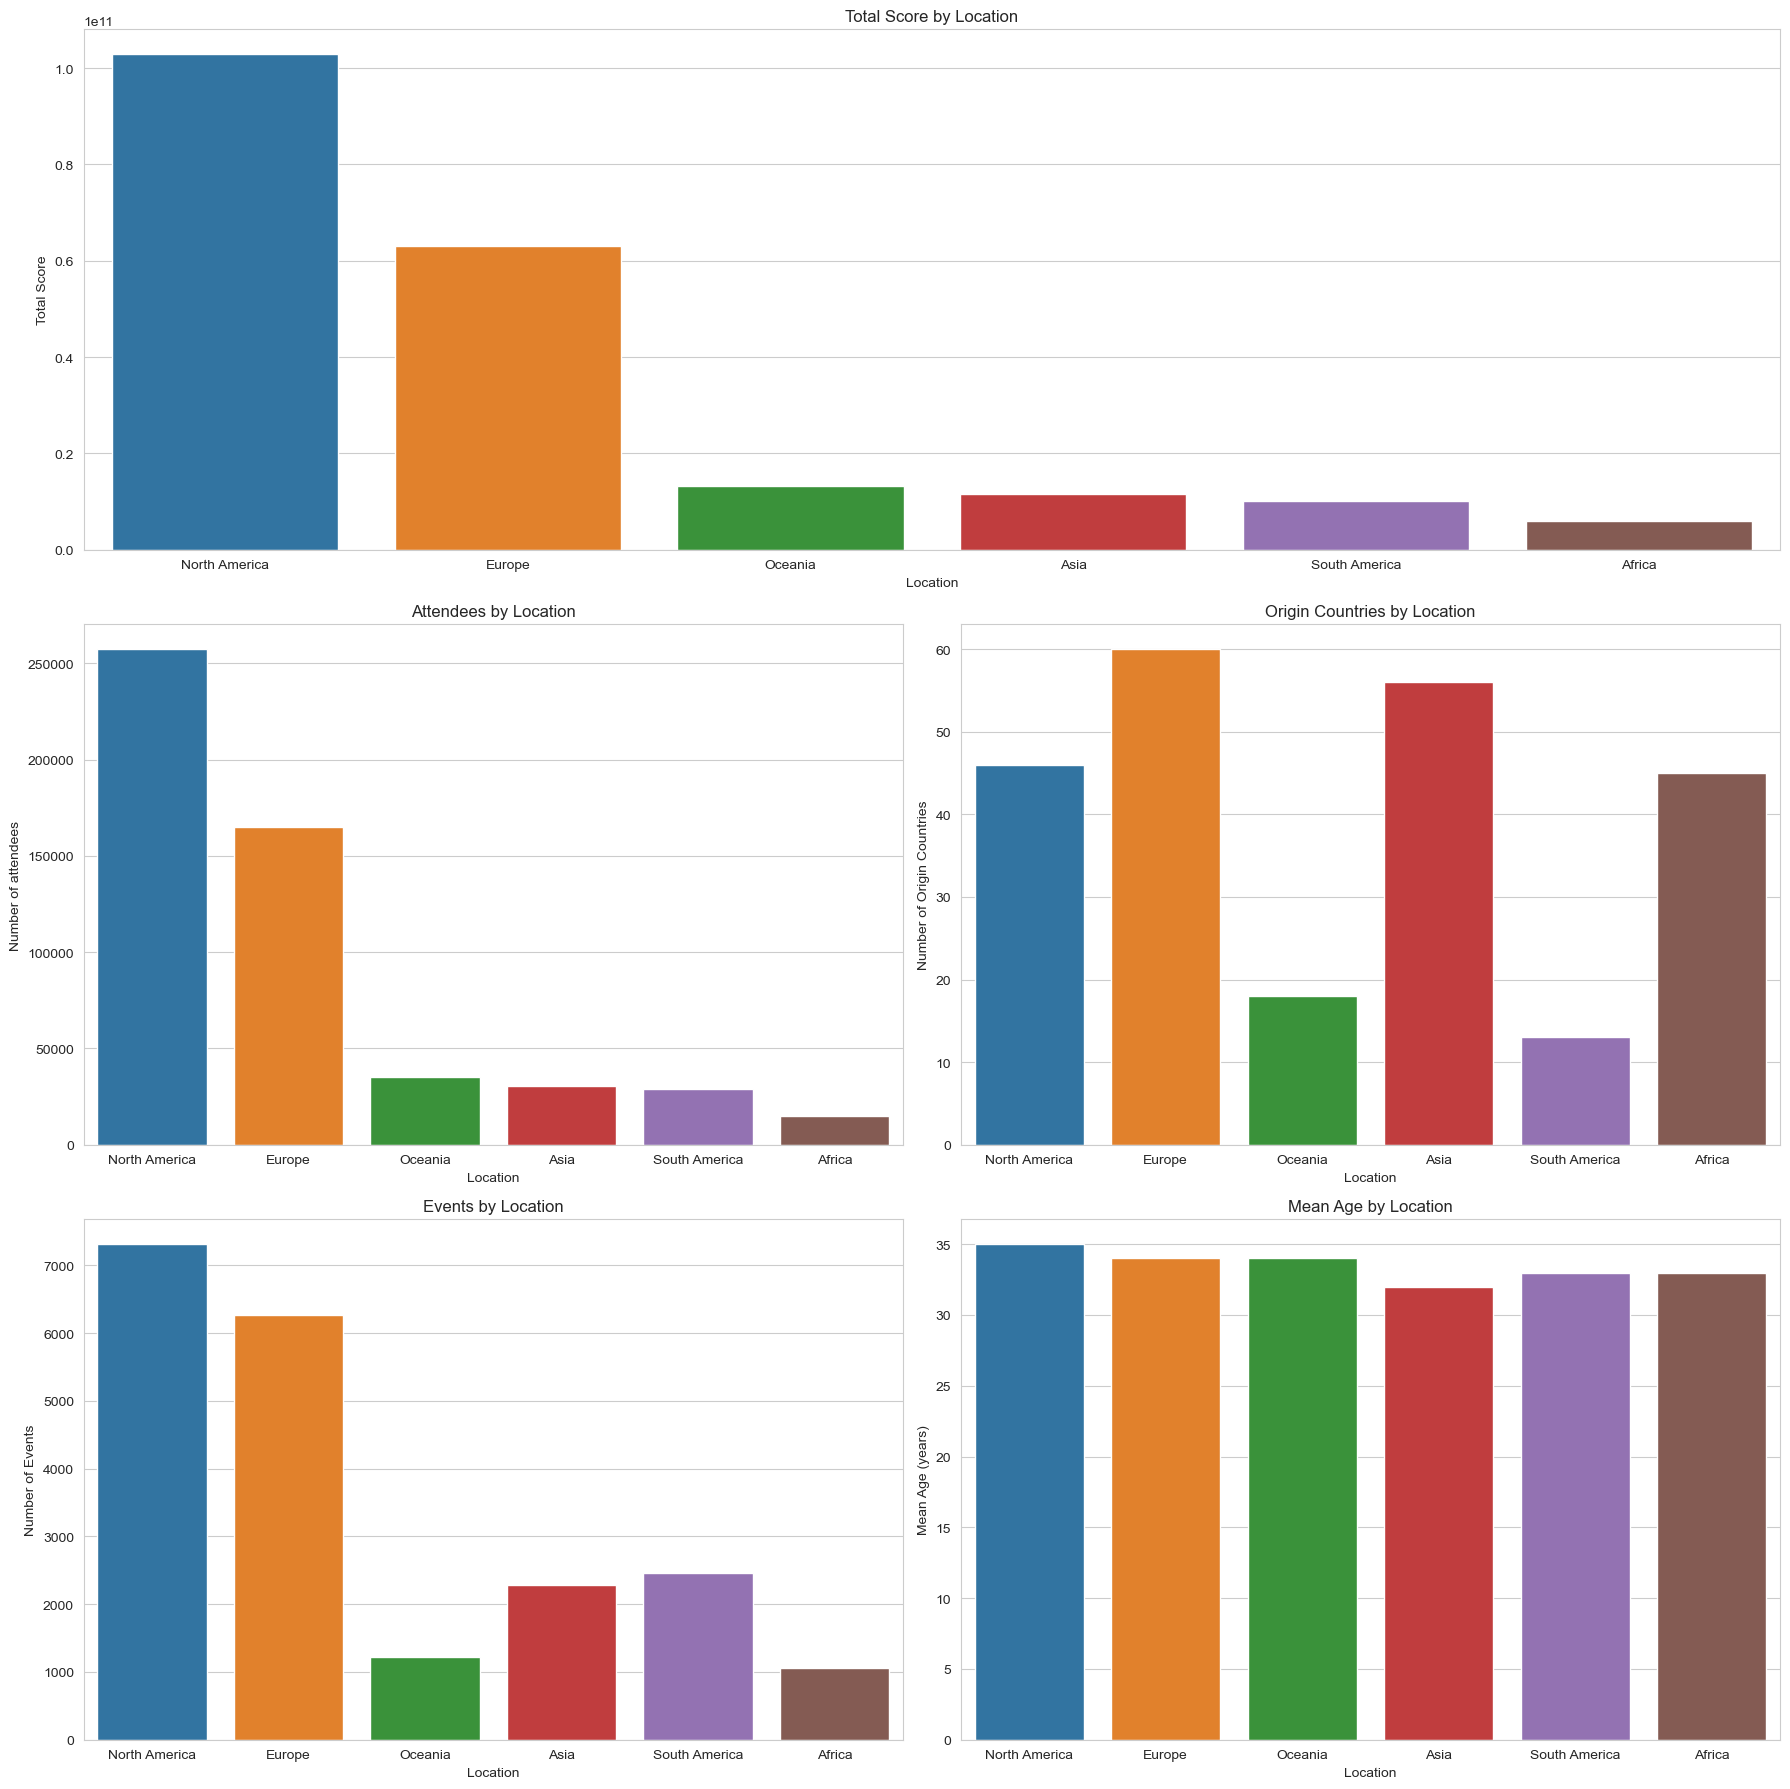

In [24]:
fig = plt.figure(figsize=(18,18))

colors = sns.palettes.color_palette("Set2")

gs = GridSpec(3, 2)

ax1 = fig.add_subplot(gs[0,:])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])

ax1 = sns.barplot(x='location_clean', y='total_score', data=summary_df, ax=ax1, saturation=0.75)
ax1.set_title('Total Score by Location')
ax1.set_xlabel('Location')
ax1.set_ylabel('Total Score')

ax2 = sns.barplot(x='location_clean', y='number_of_attendees', data=summary_df, ax=ax2, saturation=0.75)
ax2.set_title('Attendees by Location')
ax2.set_xlabel('Location')
ax2.set_ylabel('Number of attendees')

ax3 = sns.barplot(x='location_clean', y='number_of_origin_countries', data=summary_df, ax=ax3, saturation=0.75)
ax3.set_title('Origin Countries by Location')
ax3.set_xlabel('Location')
ax3.set_ylabel('Number of Origin Countries')

ax4 = sns.barplot(x='location_clean', y='number_of_events', data=summary_df, ax=ax4, saturation=0.75)
ax4.set_title('Events by Location')
ax4.set_xlabel('Location')
ax4.set_ylabel('Number of Events')

ax5 = sns.barplot(x='location_clean', y='mean_age', data=summary_df, ax=ax5, saturation=0.75)
ax5.set_title('Mean Age by Location')
ax5.set_xlabel('Location')
ax5.set_ylabel('Mean Age (years)')

plt.tight_layout()